# Some tips with xarray and pandas

- We have massively different levels here
- Try to make some aims for technical skills you can learn!
- If you are beginning with python --> learn the basics
- If you are good at basic python --> learn new packages
- If you know all the packages --> improve your skills with producing your own software etc. 
- If you don't know git and github --> get better at this!


## print('Hey world')

<span style="color:red;font-weight:700;font-size:20px">
Please feel free to come with suggestions and extra input as we go! 
</span>



<span style="color:blue;font-weight:700;font-size:20px">
Questions:

- How many have used jupyter lab?     
- How many have used pandas? 
- How many have used xarray? 
</span>



## What are pandas and xarray?
- Pandas --> like a spreadsheet 2D data with columns and rows
- xarray --> like pandas, but in N dimensions
- **Use the functionality these packages gives you! Will help you avoid mistakes. Try to get as good as possible :)**


### Pandas
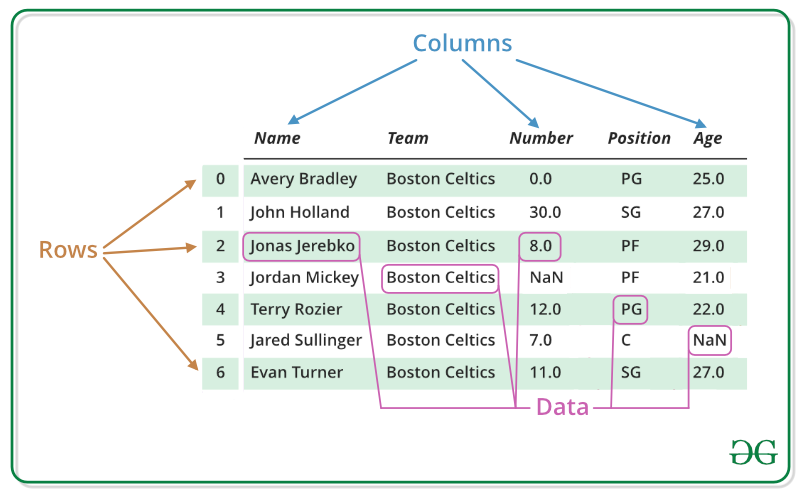
(Source: https://www.geeksforgeeks.org/python-pandas-dataframe/)

### Xarray
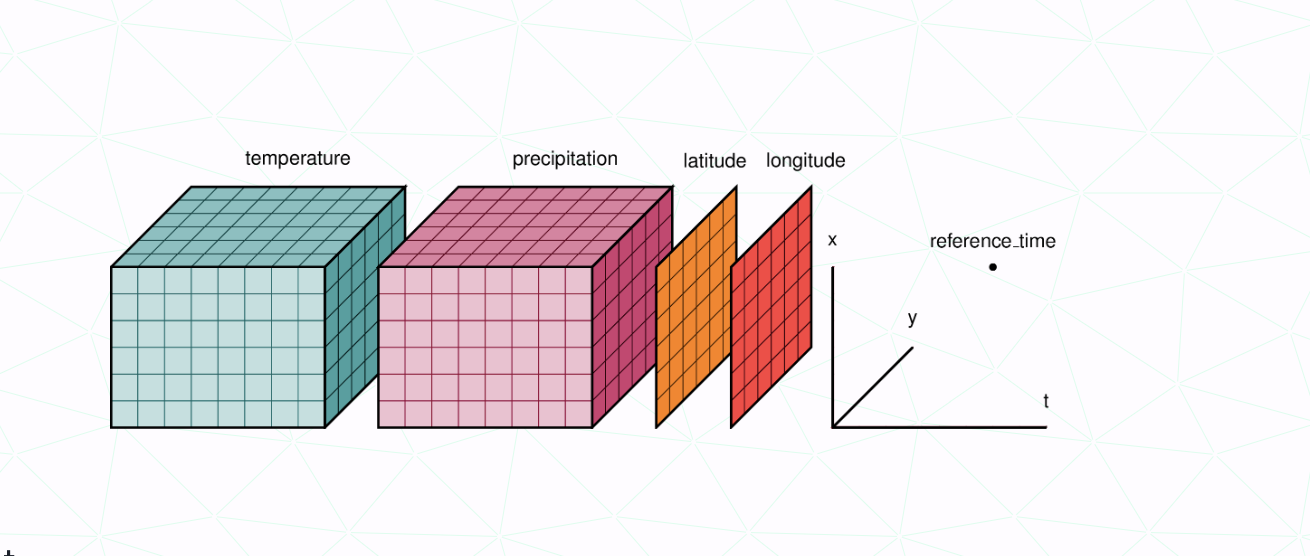
(Source: https://docs.xarray.dev/)

# 1. Read in CMIP6 data: We will skip this next part, but you can check it later to read data: 
#### Import python packages

In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

### Open CMIP6 online catalog

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60



### Search corresponding data 

Please check [here](https://pangeo-data.github.io/escience-2022/pangeo101/data_discovery.html?highlight=cmip6) for info about CMIP and variables :) 

Particularly useful is maybe the variable search which you find here: https://clipc-services.ceda.ac.uk/dreq/mipVars.html 

In [3]:
cat = col.search(source_id=['CESM2'], experiment_id=['historical'], table_id=['Amon','fx','AERmon'], 
                 variable_id=['tas','hurs', 'areacella','mmrso4' ], member_id=['r1i1p1f1'])
cat.df


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r1i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
1,CMIP,NCAR,CESM2,historical,r1i1p1f1,AERmon,mmrso4,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
2,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,hurs,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
3,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308


### Create dictionary from the list of datasets we found
- This step may take several minutes so be patient!

In [4]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
list(dset_dict.keys())

['CMIP.NCAR.CESM2.historical.fx.gn',
 'CMIP.NCAR.CESM2.historical.Amon.gn',
 'CMIP.NCAR.CESM2.historical.AERmon.gn']

### Open dataset

- Use `xarray` python package to analyze netCDF dataset
- `open_dataset` allows to get all the metadata without loading data into memory. 
- with `xarray`, we only load into memory what is needed.

In [6]:
ds1 = dset_dict['CMIP.NCAR.CESM2.historical.Amon.gn']
ds2 = dset_dict['CMIP.NCAR.CESM2.historical.fx.gn']
ds3 = dset_dict['CMIP.NCAR.CESM2.historical.AERmon.gn']

In [7]:
ds1

<xarray.Dataset>
Dimensions:    (member_id: 1, time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: nbnd
Data variables:
    hurs       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/47)
    physics_index:           1
    sub_experiment_id:       none
    realization_index:       1
    parent_experiment_id:    piControl
    branch_time_in_parent:   219000.0
    cesm_casename:           b.e21.BHIST.f09_g17.CMIP6-historical.001
    ...                      ...
    parent_variant_label:    r1i1p1f1
    forcing_index:           1
    parent_mip_era:          CMIP6
    external_variables:      areacella
    data_specs_version:      01.00.29
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.Amon.gn

In [8]:
ds3

<xarray.Dataset>
Dimensions:    (lev: 32, nbnd: 2, lat: 192, lon: 288, member_id: 1, time: 1980)
Coordinates:
    a_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lev        (lev) float64 -3.643 -7.595 -14.36 ... -957.5 -976.3 -992.6
    lev_bnds   (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: nbnd
Data variables:
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4     (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 32, 192, 288), meta=np.ndarray>
    p0         float32 ...
    ps         (time, lat, lon) float32 dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
Attributes: (12/50)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-11-04;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/068116b9-bea7-4f4d-a942-e0bbee279412
    version_id:              v20190308
    intake_esm_varname:      ['mmrso4']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.AERmon.gn

<span style="color:black;font-weight:700;font-size:20px">
Since I have already checked that these datasets are on the same grid, we can merge them:
</span>




In [9]:
ds_list = [dset_dict[l].drop('lat_bnds') for l in dset_dict.keys()]
ds = xr.merge(ds_list)

In [10]:
ds

<xarray.Dataset>
Dimensions:    (member_id: 1, lat: 192, lon: 288, nbnd: 2, time: 1980, lev: 32)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    a_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev        (lev) float64 -3.643 -7.595 -14.36 ... -957.5 -976.3 -992.6
    lev_bnds   (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    hurs       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4     (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 32, 192, 288), meta=np.ndarray>
    p0         float32 ...
    ps         (time, lat, lon) float32 dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/75033260-7bd2-46b9-9d98-3456f176d588
    version_id:              v20190308
    intake_esm_varname:      ['areacella']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.fx.gn

## 1.1 Reading in the data from file:

```python
path='filename.nc'
ds = xr.open_dataset(path)
```

##### Opening multiple files:

```python

list_of_files = [
    'file1.nc',
    'file2.nc'
]
xr.open_mfdataset(list_of_files, concat_dim='time',combine='by_coords')
```

# 2. Check how your dataset looks

#### Different types of information/data:
- Coordinates
- Data variables
- Global attributes
- Variable attributes

In [11]:
ds

<xarray.Dataset>
Dimensions:    (member_id: 1, lat: 192, lon: 288, nbnd: 2, time: 1980, lev: 32)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    a_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev        (lev) float64 -3.643 -7.595 -14.36 ... -957.5 -976.3 -992.6
    lev_bnds   (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    hurs       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4     (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 32, 192, 288), meta=np.ndarray>
    p0         float32 ...
    ps         (time, lat, lon) float32 dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/75033260-7bd2-46b9-9d98-3456f176d588
    version_id:              v20190308
    intake_esm_varname:      ['areacella']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.fx.gn

# 3. Sometimes we want to do some nice tweaks before we start: 

### Selecting data and super quick plotting:

xarray loads data only when it needs to (it's lazy, Anne can explain), and you might want to early on define the subset of data you want to look at so that you don't end up loading a lot of extra data. 


##### See [here](http://xarray.pydata.org/en/stable/user-guide/indexing.html) for nice overview

In order to reduce unecessary calculations and loading of data, think about which part of the data you want, and slice early on. 

### Slice in time: the sel method

In [12]:
ds

<xarray.Dataset>
Dimensions:    (member_id: 1, lat: 192, lon: 288, nbnd: 2, time: 1980, lev: 32)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    a_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev        (lev) float64 -3.643 -7.595 -14.36 ... -957.5 -976.3 -992.6
    lev_bnds   (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    hurs       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4     (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 32, 192, 288), meta=np.ndarray>
    p0         float32 ...
    ps         (time, lat, lon) float32 dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/75033260-7bd2-46b9-9d98-3456f176d588
    version_id:              v20190308
    intake_esm_varname:      ['areacella']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.fx.gn

In [13]:
dss = ds.sel(time = slice('1990-01-01','2010-01-01'))

In [14]:
dss

<xarray.Dataset>
Dimensions:    (member_id: 1, lat: 192, lon: 288, nbnd: 2, time: 240, lev: 32)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * time       (time) object 1990-01-15 12:00:00 ... 2009-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(240, 2), meta=np.ndarray>
    a_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev        (lev) float64 -3.643 -7.595 -14.36 ... -957.5 -976.3 -992.6
    lev_bnds   (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    hurs       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4     (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 32, 192, 288), meta=np.ndarray>
    p0         float32 ...
    ps         (time, lat, lon) float32 dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/75033260-7bd2-46b9-9d98-3456f176d588
    version_id:              v20190308
    intake_esm_varname:      ['areacella']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.fx.gn


<span style="color:red;font-weight:700;font-size:20px">
NB: Always check that the function you are using is doing what you expect!
</span>


You might even select only the arctic e.g.: 

#### isel, sel: index selecting 

Select the surface (which in this case is the last index :) 

In [15]:
dss

<xarray.Dataset>
Dimensions:    (member_id: 1, lat: 192, lon: 288, nbnd: 2, time: 240, lev: 32)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * time       (time) object 1990-01-15 12:00:00 ... 2009-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(240, 2), meta=np.ndarray>
    a_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev        (lev) float64 -3.643 -7.595 -14.36 ... -957.5 -976.3 -992.6
    lev_bnds   (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    hurs       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4     (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 32, 192, 288), meta=np.ndarray>
    p0         float32 ...
    ps         (time, lat, lon) float32 dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/75033260-7bd2-46b9-9d98-3456f176d588
    version_id:              v20190308
    intake_esm_varname:      ['areacella']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.fx.gn

In [16]:
dss_s = dss.isel(lev=-1)

In [17]:
dss_s

<xarray.Dataset>
Dimensions:    (member_id: 1, lat: 192, lon: 288, nbnd: 2, time: 240)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * time       (time) object 1990-01-15 12:00:00 ... 2009-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(240, 2), meta=np.ndarray>
    a_bnds     (nbnd) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    b_bnds     (nbnd) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lev        float64 -992.6
    lev_bnds   (nbnd) float64 dask.array<chunksize=(2,), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    hurs       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
    a          float64 dask.array<chunksize=(), meta=np.ndarray>
    b          float64 dask.array<chunksize=(), meta=np.ndarray>
    mmrso4     (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 10, 192, 288), meta=np.ndarray>
    p0         float32 ...
    ps         (time, lat, lon) float32 dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/75033260-7bd2-46b9-9d98-3456f176d588
    version_id:              v20190308
    intake_esm_varname:      ['areacella']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.fx.gn

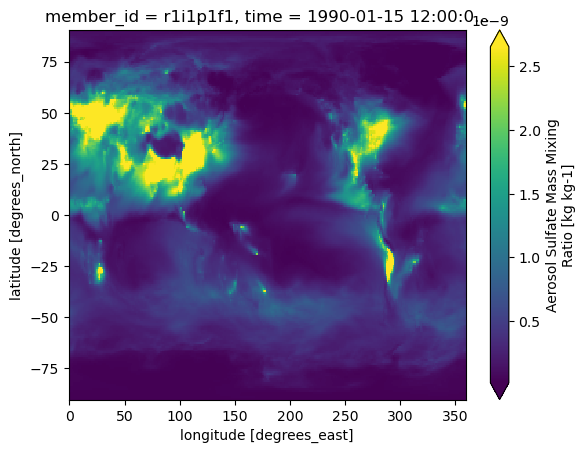

In [18]:
dss_s['mmrso4'].isel(time=0).plot(robust=True)

## 3.2 Calculates variables and assign attributes! 
Nice for plotting and to keep track of what is in your dataset (especially 'units' and 'standard_name'/'long_name' will be looked for by xarray.

In [19]:
dss['T_C'] = dss['tas']-273.15

In [20]:
dss['T_C'] = dss['T_C'].assign_attrs({'units': '$^\circ$C'})

In [21]:
dss['T_C']

<xarray.DataArray 'T_C' (member_id: 1, time: 240, lat: 192, lon: 288)>
dask.array<sub, shape=(1, 240, 192, 288), dtype=float32, chunksize=(1, 120, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) <U8 'r1i1p1f1'
  * time       (time) object 1990-01-15 12:00:00 ... 2009-12-15 12:00:00
Attributes:
    units:    $^\circ$C

<span style="color:green;font-weight:700;font-size:20px">
May always be small things you need to adjust: 
</span>



In [22]:
dss['time']

<xarray.DataArray 'time' (time: 240)>
array([cftime.DatetimeNoLeap(1990, 1, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1990, 2, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1990, 3, 15, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2009, 10, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2009, 11, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2009, 12, 15, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1990-01-15 12:00:00 ... 2009-12-15 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    title:          time
    type:           double

This calendar is in cftime and noLeap. Sometimes this causes issues when plotting timeseries, so just for fun we will convert to normal calendar because it's anyway monthly.

In [23]:
dss['time'] = dss['time'].to_dataframe().index.to_datetimeindex()

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:360: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_6635/4195133999.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dss['time'] = dss['time'].to_dataframe().index.to_datetimeindex()


In [24]:
dss['time']

<xarray.DataArray 'time' (time: 240)>
array(['1990-01-15T12:00:00.000000000', '1990-02-14T00:00:00.000000000',
       '1990-03-15T12:00:00.000000000', ..., '2009-10-15T12:00:00.000000000',
       '2009-11-15T00:00:00.000000000', '2009-12-15T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1990-01-15T12:00:00 ... 2009-12-15T12:00:00


<span style="color:green;font-weight:700;font-size:20px">
We get a warning, but it's ok as long as we know what we are doing. 
</span>




### 3.3 Convert longitude: 
this data comes in 0--360 degrees, but often -180 to 180 is more convenient. So we can convert:

**NOTE:** Maybe you want to put this in a module? Or a package.. 

In [25]:
dss

<xarray.Dataset>
Dimensions:    (member_id: 1, lat: 192, lon: 288, nbnd: 2, time: 240, lev: 32)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * time       (time) datetime64[ns] 1990-01-15T12:00:00 ... 2009-12-15T12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(240, 2), meta=np.ndarray>
    a_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev        (lev) float64 -3.643 -7.595 -14.36 ... -957.5 -976.3 -992.6
    lev_bnds   (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    hurs       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4     (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 32, 192, 288), meta=np.ndarray>
    p0         float32 ...
    ps         (time, lat, lon) float32 dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
    T_C        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/75033260-7bd2-46b9-9d98-3456f176d588
    version_id:              v20190308
    intake_esm_varname:      ['areacella']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.fx.gn

In [26]:
from util import convert360_180

(migth want to move this to a module!) 

In [27]:
dss = convert360_180(dss)

In [28]:
dss['lon'].attrs['units'] = '$^\circ$ East'

In [29]:
dss['lon']

<xarray.DataArray 'lon' (lon: 288)>
array([-180.  , -178.75, -177.5 , ...,  176.25,  177.5 ,  178.75])
Coordinates:
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
Attributes:
    axis:           X
    bounds:         lon_bnds
    standard_name:  longitude
    title:          Longitude
    type:           double
    units:          $^\circ$ East
    valid_max:      360.0
    valid_min:      0.0

Notice how the labels use both the attribute "standard_name" and "units" from the dataset. 

# 4. The easiest interpolation: select with 'nearest' neighboor

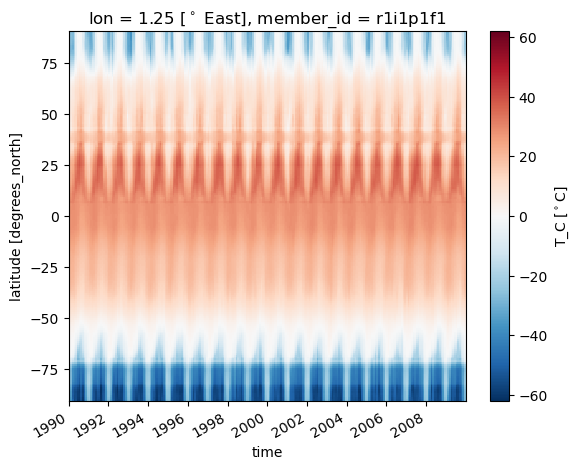

In [30]:
dss['T_C'].sel(lon=1.3,method='nearest').plot(x='time')

Example: let's select zeppelin station: 
78.906661, 11.889203

In [31]:
lat_zep =78.906661
lon_zep = 11.889203

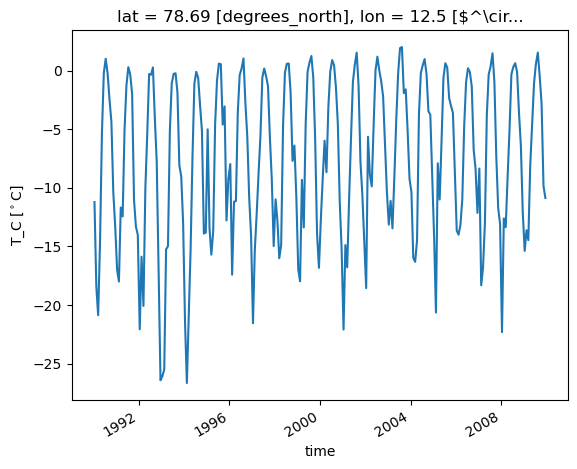

In [32]:
dss['T_C'].sel(lon=lon_zep, lat=lat_zep, method='nearest').plot()

### Super quick averaging etc

In [33]:
da_so4 = dss['mmrso4']


Mean: 
  

ValueError: Found negative or zero value in coordinates. Coordinates must be positive on logscale plots.

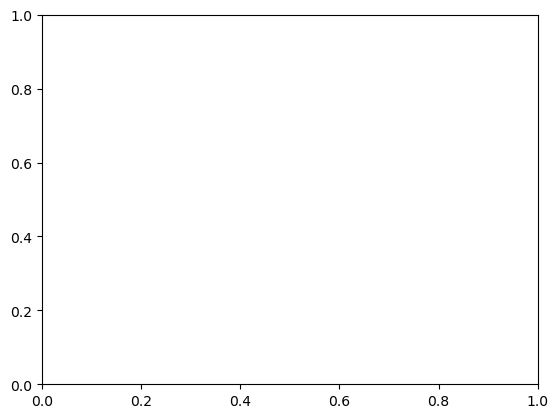

In [34]:
da_so4.mean(['time','lon'], keep_attrs=True).plot(ylim=[1000,100], yscale='log')

In [35]:
da_so4['lev'] = np.abs(da_so4['lev'].values)

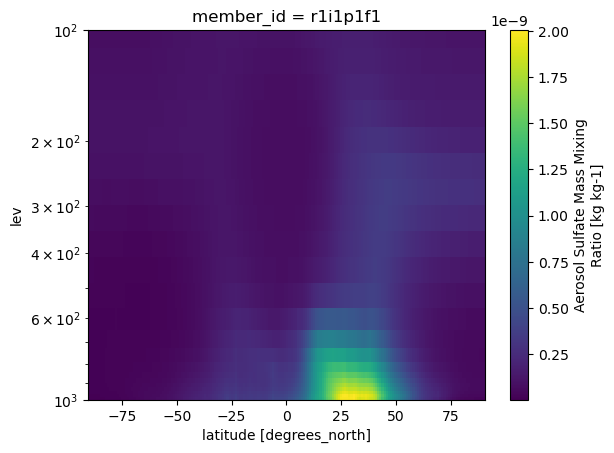

In [36]:
da_so4.mean(['time','lon'], keep_attrs=True).plot(ylim=[1000,100], yscale='log')

Standard deviation

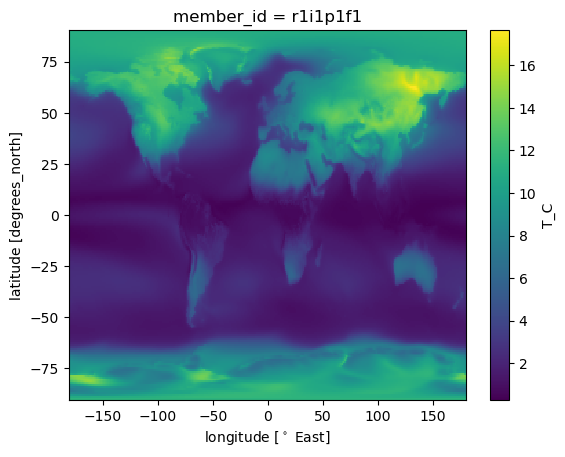

In [37]:
dss['T_C'].std(['time']).plot()

Temperature change much stronger over land than ocean...

## Mask data and groupby: pick out seasons

In [38]:
month = ds['time.month']

In [39]:
month

<xarray.DataArray 'month' (time: 1980)>
array([ 1,  2,  3, ..., 10, 11, 12])
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

In [40]:
dss_JA = dss.where(month.isin([7,8])).mean('time')

In [41]:
dss_JA

<xarray.Dataset>
Dimensions:    (member_id: 1, lat: 192, lon: 288, lev: 32, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * member_id  (member_id) <U8 'r1i1p1f1'
  * lev        (lev) float64 -3.643 -7.595 -14.36 ... -957.5 -976.3 -992.6
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
    a_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    lev_bnds   (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    hurs       (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    tas        (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4     (member_id, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    p0         float64 nan
    ps         (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
    T_C        (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>

In [42]:
dss_season = dss.groupby('time.season').mean(keep_attrs=True)

In [43]:
dss_season

<xarray.Dataset>
Dimensions:    (member_id: 1, season: 4, lat: 192, lon: 288, lev: 32, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
    b_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev        (lev) float64 -3.643 -7.595 -14.36 ... -957.5 -976.3 -992.6
    lev_bnds   (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    a_bnds     (lev, nbnd) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: nbnd
Data variables:
    hurs       (member_id, season, lat, lon) float32 dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    tas        (member_id, season, lat, lon) float32 dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    mmrso4     (member_id, season, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 32, 192, 288), meta=np.ndarray>
    ps         (season, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    T_C        (member_id, season, lat, lon) float32 dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    areacella  (season, member_id, lat, lon) float32 dask.array<chunksize=(4, 1, 192, 288), meta=np.ndarray>
    a          (season, lev) float64 dask.array<chunksize=(4, 32), meta=np.ndarray>
    b          (season, lev) float64 dask.array<chunksize=(4, 32), meta=np.ndarray>
    p0         (season) float32 1e+05 1e+05 1e+05 1e+05
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/75033260-7bd2-46b9-9d98-3456f176d588
    version_id:              v20190308
    intake_esm_varname:      ['areacella']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.fx.gn

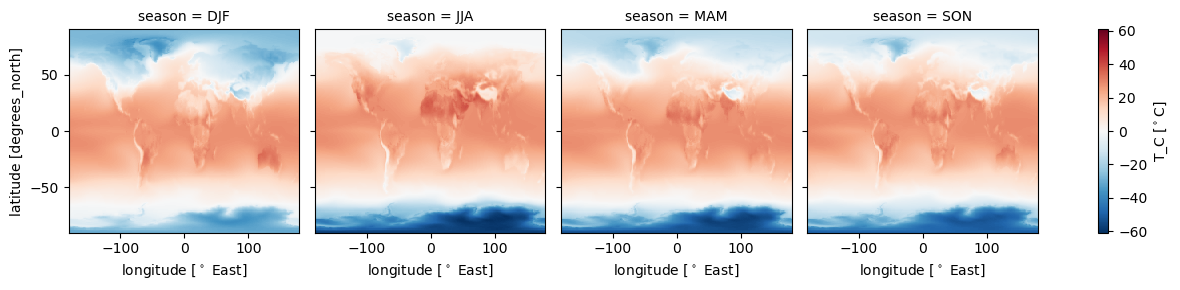

In [44]:
dss_season['T_C'].plot(col='season')

## Controle the plot visuals:

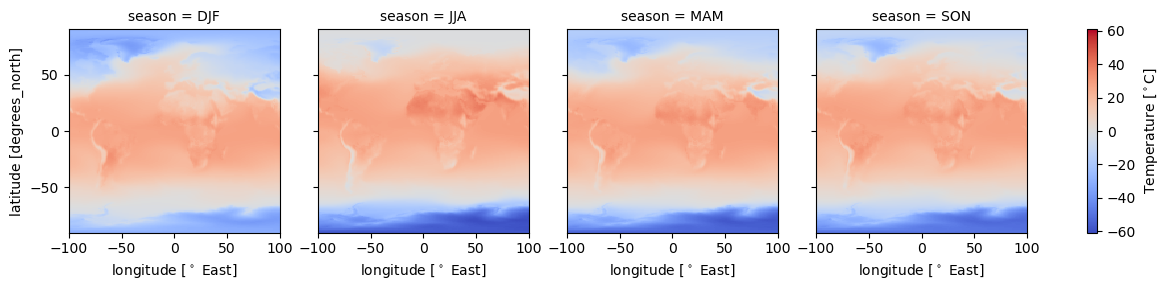

In [45]:
dss_season['T_C'].plot(col='season',
                       cmap = 'coolwarm',#ax=ax,
                      xlim=[-100,100],
                   cbar_kwargs={'label':'Temperature [$^\circ$C]'})

# 5. Plotting with cartopy

In [46]:
import cartopy as cy
import cartopy.crs as ccrs

In [47]:
da_plt = dss['mmrso4'].isel(lev=-1).mean('time', keep_attrs=True).squeeze()#('member_id')

In [48]:
da_plt

<xarray.DataArray 'mmrso4' (lat: 192, lon: 288)>
dask.array<getitem, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
    member_id  <U8 'r1i1p1f1'
    lev        float64 -992.6
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        Dry mass of sulfate (SO4) in aerosol particles as a fract...
    description:    Dry mass of sulfate (SO4) in aerosol particles as a fract...
    frequency:      mon
    id:             mmrso4
    long_name:      Aerosol Sulfate Mass Mixing Ratio
    mipTable:       AERmon
    out_name:       mmrso4
    prov:           AERmon ((isd.003))
    realm:          aerosol
    standard_name:  mass_fraction_of_sulfate_dry_aerosol_particles_in_air
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Aerosol Sulfate Mass Mixing Ratio
    type:           real
    units:          kg kg-1
    variable_id:    mmrso4

In [50]:
from matplotlib.colors import LogNorm

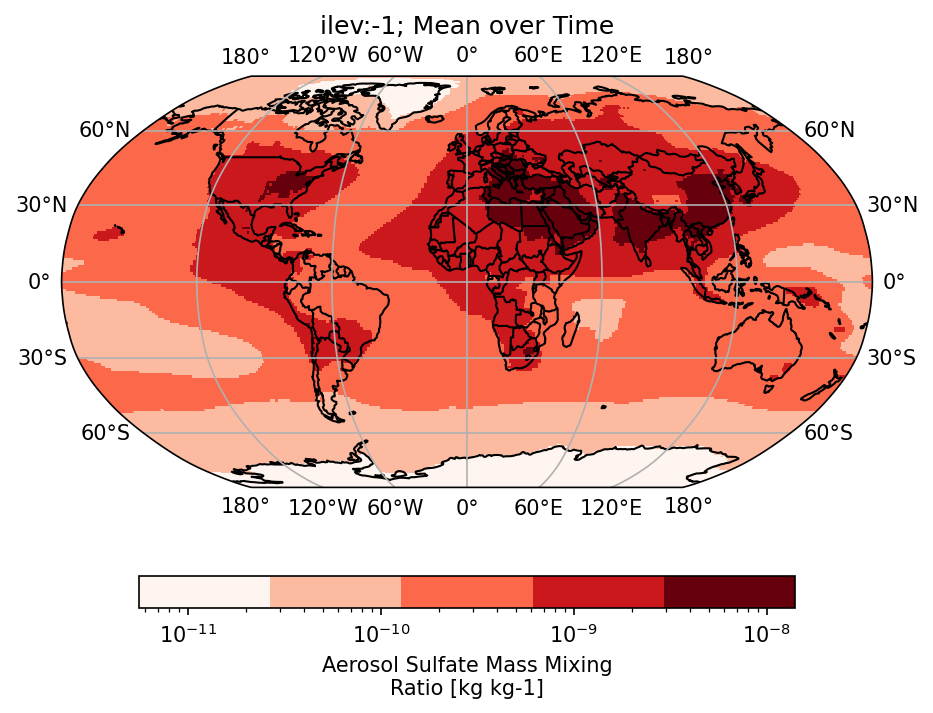

In [51]:
f,ax = plt.subplots(1,1,dpi=150,subplot_kw={'projection':ccrs.Robinson()})


da_plt.plot.pcolormesh(
    cmap = plt.get_cmap('Reds'),
    ax=ax,
    norm = LogNorm(),
    cbar_kwargs={
        #'label':'Wind Speed [m/s]', 
        'orientation':'horizontal',
        'shrink':.8
    },
    transform=ccrs.PlateCarree(), 
    #x='lon',y='lat',
    levels = 6
)
ax.set_title('ilev:-1; Mean over Time')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
#gl.xlabels_top = False
#gl.ylabels_right = False
#gl.top_labels(False)
ax.add_feature(cy.feature.BORDERS);
f.tight_layout()

# 6. Global average: weighted means!

In [53]:
dss['T_C'].mean().compute()

<xarray.DataArray 'T_C' ()>
array(5.447856, dtype=float32)

In [54]:
dss['T_C'].weighted(dss['areacella']).mean().compute()

<xarray.DataArray 'T_C' ()>
array(14.715081, dtype=float32)

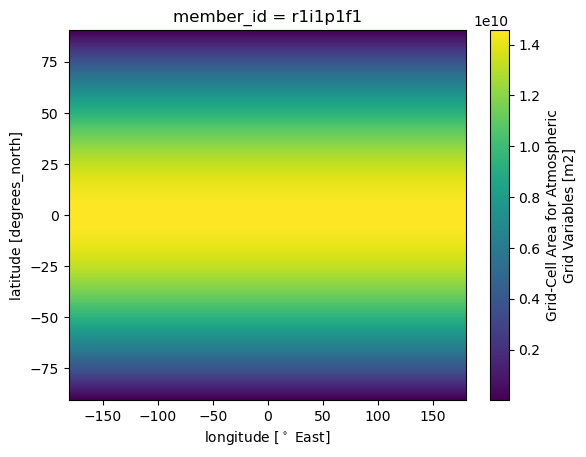

In [55]:
dss['areacella'].plot()

# 7. Convert to pandas & do some random fun stuff: 

Maybe we e.g. want to compare with a station, or just use some of the considerable functionalities available from pandas. It's easy to convert back and forth between xarray and pandas:

<span style="color:green;font-weight:700;font-size:20px">
A lot of these functions also exist in xarray!
</span>



## Pick out station: 

In [56]:
lat_tjarno = 58.9
lon_tjarno = 11.1
# pick out surface
ds_surf =dss.isel(lev=-1)
ds_tjarno = ds_surf.sel(lat=lat_tjarno, lon = lon_tjarno, method ='nearest')

In [57]:
ds_tjarno

<xarray.Dataset>
Dimensions:    (member_id: 1, nbnd: 2, time: 240)
Coordinates:
    lat        float64 58.9
    lon        float64 11.25
    lon_bnds   (nbnd) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * time       (time) datetime64[ns] 1990-01-15T12:00:00 ... 2009-12-15T12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(240, 2), meta=np.ndarray>
    a_bnds     (nbnd) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    b_bnds     (nbnd) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lev        float64 -992.6
    lev_bnds   (nbnd) float64 dask.array<chunksize=(2,), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (member_id) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    hurs       (member_id, time) float32 dask.array<chunksize=(1, 120), meta=np.ndarray>
    tas        (member_id, time) float32 dask.array<chunksize=(1, 120), meta=np.ndarray>
    a          float64 dask.array<chunksize=(), meta=np.ndarray>
    b          float64 dask.array<chunksize=(), meta=np.ndarray>
    mmrso4     (member_id, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    p0         float32 ...
    ps         (time) float32 dask.array<chunksize=(10,), meta=np.ndarray>
    T_C        (member_id, time) float32 dask.array<chunksize=(1, 120), meta=np.ndarray>
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/75033260-7bd2-46b9-9d98-3456f176d588
    version_id:              v20190308
    intake_esm_varname:      ['areacella']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.fx.gn

In [58]:
vl = ['mmrso4','hurs','tas','T_C']

In [59]:
ds_tjarno[vl]

<xarray.Dataset>
Dimensions:    (member_id: 1, time: 240)
Coordinates:
    lat        float64 58.9
    lon        float64 11.25
  * member_id  (member_id) <U8 'r1i1p1f1'
  * time       (time) datetime64[ns] 1990-01-15T12:00:00 ... 2009-12-15T12:00:00
    lev        float64 -992.6
Data variables:
    mmrso4     (member_id, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    hurs       (member_id, time) float32 dask.array<chunksize=(1, 120), meta=np.ndarray>
    tas        (member_id, time) float32 dask.array<chunksize=(1, 120), meta=np.ndarray>
    T_C        (member_id, time) float32 dask.array<chunksize=(1, 120), meta=np.ndarray>
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/75033260-7bd2-46b9-9d98-3456f176d588
    version_id:              v20190308
    intake_esm_varname:      ['areacella']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.fx.gn

### Resample:

In [60]:
df_tjarno = ds_tjarno[vl].squeeze().to_dataframe()

In [61]:
df_tjarno

,mmrso4,hurs,tas,T_C,lat,lon,member_id,lev
time,,,,,,,,
1990-01-15 12:00:00,9.264967e-10,89.233849,275.603851,2.453857,58.900524,11.25,r1i1p1f1,-992.556095
1990-02-14 00:00:00,7.049255e-10,82.765656,271.453064,-1.696930,58.900524,11.25,r1i1p1f1,-992.556095
1990-03-15 12:00:00,1.147899e-09,83.034279,276.359680,3.209686,58.900524,11.25,r1i1p1f1,-992.556095
1990-04-15 00:00:00,6.494133e-10,73.870636,279.862518,6.712524,58.900524,11.25,r1i1p1f1,-992.556095
1990-05-15 12:00:00,2.289224e-09,74.073692,283.468597,10.318604,58.900524,11.25,r1i1p1f1,-992.556095
...,...,...,...,...,...,...,...,...
2009-08-15 12:00:00,5.304504e-10,77.305382,290.360901,17.210907,58.900524,11.25,r1i1p1f1,-992.556095
2009-09-15 00:00:00,5.245591e-10,75.595207,287.631470,14.481476,58.900524,11.25,r1i1p1f1,-992.556095
2009-10-15 12:00:00,4.940789e-10,83.765961,283.187012,10.037018,58.900524,11.25,r1i1p1f1,-992.556095


In [62]:
df_yearly = df_tjarno.resample('Y').mean()#.plot()

<AxesSubplot:xlabel='time'>

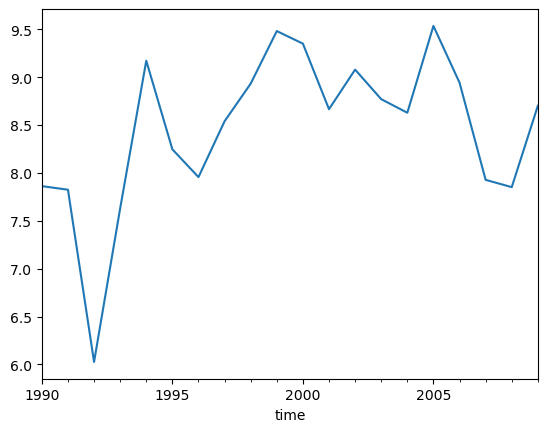

In [63]:
df_yearly['T_C'].plot()

In [64]:
df_tjarno['season'] = df_tjarno.to_xarray()['time.season']



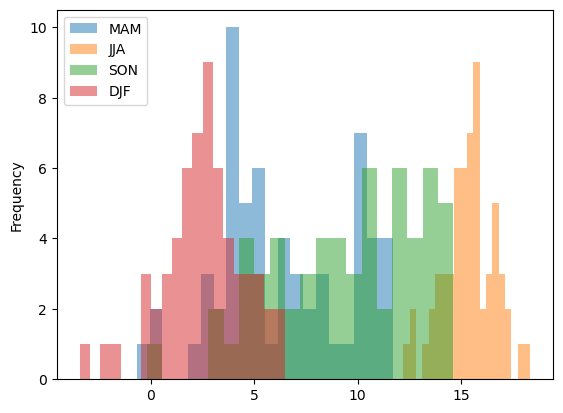

In [65]:
for s in ['MAM','JJA','SON','DJF']:
    df_tjarno[df_tjarno['season']==s]['T_C'].plot.hist(alpha=0.5, bins=20, label=s)
    
plt.legend()

In [66]:
df = dss.isel(lev=-1)[vl].to_dataframe()

In [67]:
df_ri = df.reset_index()
df_ri.head()

,member_id,time,lat,lon,mmrso4,hurs,tas,T_C,lev
0,r1i1p1f1,1990-01-15 12:00:00,-90.0,-180.00,2.049096e-11,98.689842,242.897797,-30.252197,-992.556095
1,r1i1p1f1,1990-01-15 12:00:00,-90.0,-178.75,2.049095e-11,98.675537,242.903198,-30.246796,-992.556095
2,r1i1p1f1,1990-01-15 12:00:00,-90.0,-177.50,2.049095e-11,98.675537,242.903198,-30.246796,-992.556095
3,r1i1p1f1,1990-01-15 12:00:00,-90.0,-176.25,2.049095e-11,98.675537,242.903198,-30.246796,-992.556095
4,r1i1p1f1,1990-01-15 12:00:00,-90.0,-175.00,2.049095e-11,98.675537,242.903198,-30.246796,-992.556095


### lets do something unnecesarily complicated :D 

## qcut, cut

qcut splits the data into quantile ranges

In [68]:


df_ri['hurs_cat'] = pd.qcut(df_ri['hurs'], 
                                  q=[0.05,0.17, 0.34,0.66, 0.83,0.95], 
                                  labels=['very low','low','med','high','very high'])

Cut cuts into categories

In [69]:
df_ri['lat_cat'] = pd.cut(df_ri['lat'], [-90,-60,-30,0,30,60,90], 
                          labels=['S polar','S mid','S tropics', 'N tropic', 'N mid','N polar'])

In [70]:
df_ri.groupby('lat_cat').mean()

,lat,lon,mmrso4,hurs,tas,T_C,lev
lat_cat,,,,,,,
S polar,-74.921466,-0.625,2.556384e-11,95.399734,247.324890,-25.825100,-992.556095
S mid,-45.235602,-0.625,1.597070e-10,79.675735,282.781799,9.631801,-992.556095
S tropics,-15.078534,-0.625,3.580959e-10,76.560928,297.261230,24.111250,-992.556095
N tropic,15.078534,-0.625,1.236901e-09,73.094543,298.772369,25.622366,-992.556095
N mid,45.235602,-0.625,1.287050e-09,73.039864,282.893677,9.743673,-992.556095
N polar,75.392670,-0.625,1.318637e-10,95.613152,263.219543,-9.930449,-992.556095


<AxesSubplot:xlabel='lat_cat', ylabel='hurs'>

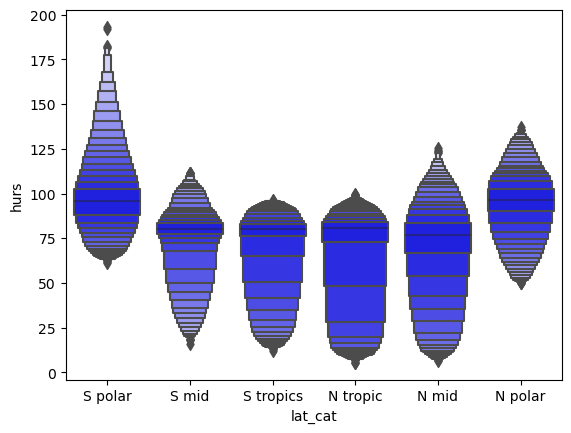

In [71]:
sns.boxenplot(x="lat_cat", y="hurs",
              color="b",
              scale="linear", data=df_ri)

<AxesSubplot:xlabel='hurs_cat', ylabel='mmrso4'>

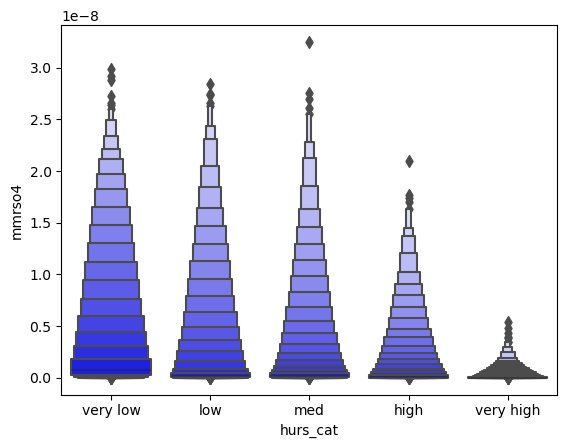

In [72]:
sns.boxenplot(x="hurs_cat", y="mmrso4",
              color="b",
              scale="linear", data=df_ri,
             )

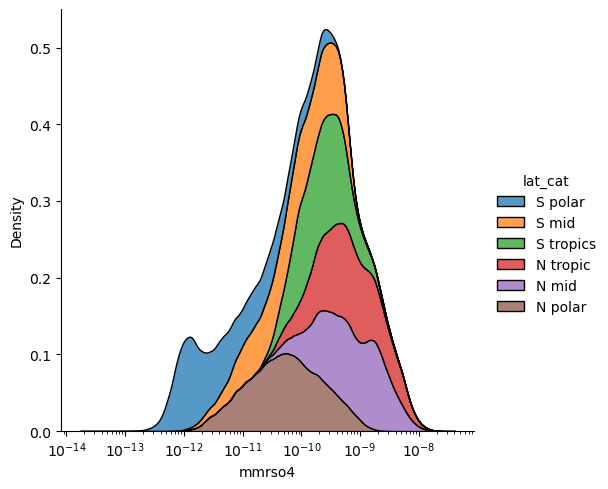

In [73]:
sns.displot(x="mmrso4",hue = 'lat_cat',log_scale=True,kind='kde',
            data=df_ri,  multiple="stack")

## Convert back to xarray if we need:

In [74]:
ds_new = df_ri.set_index(['time','lat','lon']).to_xarray()

In [75]:
ds_new

<xarray.Dataset>
Dimensions:    (time: 240, lat: 192, lon: 288)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-15T12:00:00 ... 2009-12-15T12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
Data variables:
    member_id  (time, lat, lon) object 'r1i1p1f1' 'r1i1p1f1' ... 'r1i1p1f1'
    mmrso4     (time, lat, lon) float32 2.049e-11 2.049e-11 ... 5.151e-11
    hurs       (time, lat, lon) float32 98.69 98.68 98.68 ... 106.9 106.9 106.9
    tas        (time, lat, lon) float32 242.9 242.9 242.9 ... 250.9 250.9 250.9
    T_C        (time, lat, lon) float32 -30.25 -30.25 -30.25 ... -22.28 -22.28
    lev        (time, lat, lon) float64 -992.6 -992.6 -992.6 ... -992.6 -992.6
    hurs_cat   (time, lat, lon) object 'very high' 'very high' ... nan nan
    lat_cat    (time, lat, lon) object nan nan nan ... 'N polar' 'N polar'

### mask by category 

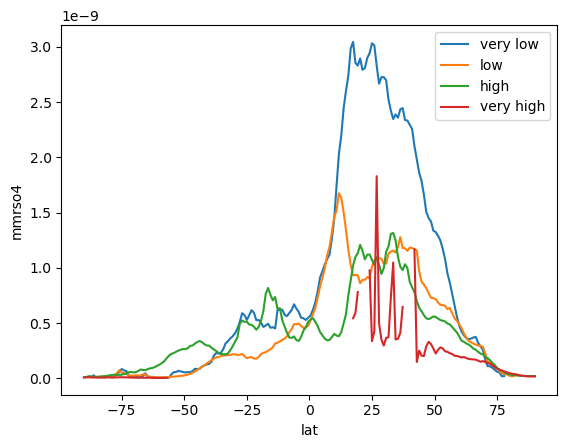

In [85]:
ds_new.where(ds_new['hurs_cat']=='very low').mean(['time','lon'])['mmrso4'].plot(label='very low')#vmin = 0, vmax = 1.5e-8)
ds_new.where(ds_new['hurs_cat']=='low').mean(['time','lon'])['mmrso4'].plot(label='low')#vmin = 0, vmax = 1.5e-8)

ds_new.where(ds_new['hurs_cat']=='high').mean(['time','lon'])['mmrso4'].plot(label='high')#vmin = 0, vmax = 1.5e-8)
ds_new.where(ds_new['hurs_cat']=='very high').mean(['time','lon'], keep_attrs=True)['mmrso4'].plot(label='very high')#vmin = 0, vmax = 1.5e-8)
plt.legend()